# Wrangling Backorder Data

In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [521]:
df=pd.read_csv('training.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_21416\2470988791.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('training.csv')


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [523]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## Cleaning

In [524]:
# Drop rows where all values are nan

df.drop(['sku'], axis=1, inplace=True)
df.dropna(how='all', inplace=True)

In [525]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [526]:
len(df)

1687860

In [527]:
set((df.columns))

{'deck_risk',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'in_transit_qty',
 'lead_time',
 'local_bo_qty',
 'min_bank',
 'national_inv',
 'oe_constraint',
 'perf_12_month_avg',
 'perf_6_month_avg',
 'pieces_past_due',
 'potential_issue',
 'ppap_risk',
 'rev_stop',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'stop_auto_buy',
 'went_on_backorder'}

In [528]:
df.isna().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [529]:
replace_values={'went_on_backorder':{'No':0, 'Yes':1}} #Encoding target column
df.replace(replace_values, inplace=True)

In [530]:
X=df.drop(['went_on_backorder'], axis=1)
y=df['went_on_backorder']

## Fixing imbalance

In [531]:
y.value_counts() # Data set is severly imbalanced

0    1676567
1      11293
Name: went_on_backorder, dtype: int64

<AxesSubplot: ylabel='went_on_backorder'>

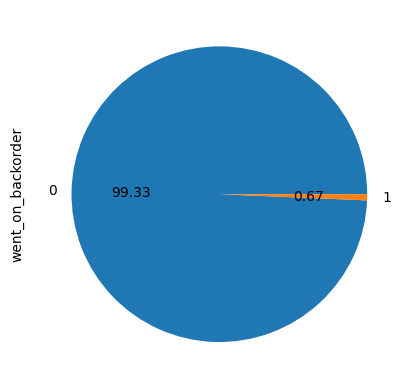

In [532]:
y.value_counts().plot.pie(autopct='%.2f') # Visualizing that dataset is severely imbalanced

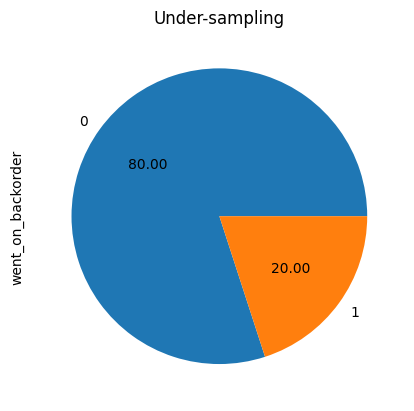

In [533]:
# Undersampling to fix imbalanced data

rus = RandomUnderSampler(sampling_strategy=0.25) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.002177,0.149740,0.100371,0.102277,0.102842,0.207086,0.257185,0.296834,0.315180,0.415592,0.095420,-0.008543,-0.002400,0.003669
lead_time,0.002177,1.000000,-0.006646,-0.006992,-0.007222,-0.007318,-0.005795,-0.005367,-0.004829,-0.004524,-0.005787,0.000023,-0.094263,-0.103142,0.002534
in_transit_qty,0.149740,-0.006646,1.000000,0.874926,0.897028,0.903645,0.919110,0.918311,0.914190,0.903908,0.839009,0.670894,0.007320,0.007581,0.023011
forecast_3_month,0.100371,-0.006992,0.874926,1.000000,0.994468,0.989174,0.930361,0.927068,0.913342,0.906529,0.889537,0.681280,0.008339,0.008326,0.036788
forecast_6_month,0.102277,-0.007222,0.897028,0.994468,1.000000,0.998779,0.948493,0.945147,0.932528,0.926617,0.898052,0.700415,0.008055,0.008013,0.034330
forecast_9_month,0.102842,-0.007318,0.903645,0.989174,0.998779,1.000000,0.955671,0.952315,0.939804,0.934165,0.898479,0.705666,0.007975,0.007913,0.033067
sales_1_month,0.207086,-0.005795,0.919110,0.930361,0.948493,0.955671,1.000000,0.994529,0.989257,0.983241,0.916196,0.684655,0.004232,0.005095,0.045284
sales_3_month,0.257185,-0.005367,0.918311,0.927068,0.945147,0.952315,0.994529,1.000000,0.997027,0.992430,0.934778,0.695564,0.004393,0.005251,0.043137
sales_6_month,0.296834,-0.004829,0.914190,0.913342,0.932528,0.939804,0.989257,0.997027,1.000000,0.997805,0.938887,0.681965,0.004580,0.005316,0.042898
sales_9_month,0.315180,-0.004524,0.903908,0.906529,0.926617,0.934165,0.983241,0.992430,0.997805,1.000000,0.943400,0.674571,0.004498,0.005201,0.036352


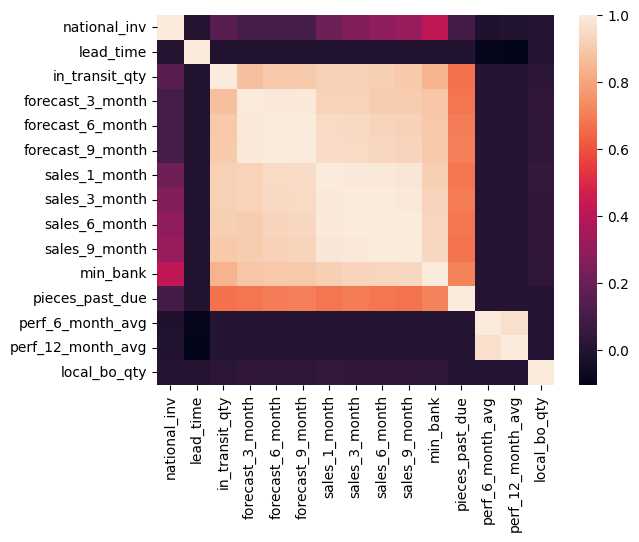

In [534]:
cor = X_res.select_dtypes(include='number').corr() # Correlation matrix for the the numeric data types in the set
cor
sns.heatmap(data=cor, cmap='rocket')
cor

In [535]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return list(col_corr)

In [536]:
highly_correlated=correlation(X_res, 0.90) # List of highly correlated features.
highly_correlated # These features have a correlation of greater than or equal to 90% with some other feature in the dataset.

C:\Users\Asus\AppData\Local\Temp\ipykernel_21416\3503626241.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


['forecast_9_month',
 'forecast_6_month',
 'sales_6_month',
 'sales_9_month',
 'sales_3_month',
 'min_bank',
 'perf_12_month_avg',
 'sales_1_month']

In [537]:
X_res.drop(highly_correlated, axis=1, inplace=True) # dropping highly correlated features

In [538]:
X_res.isna().sum()

national_inv           0
lead_time           3053
in_transit_qty         0
forecast_3_month       0
potential_issue        0
pieces_past_due        0
perf_6_month_avg       0
local_bo_qty           0
deck_risk              0
oe_constraint          0
ppap_risk              0
stop_auto_buy          0
rev_stop               0
dtype: int64

In [571]:
y=y_res
X=X_res

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [540]:
# Creating the pipeline for stepwise exectution of the column transformer, imputer, and the classifier

ct=make_column_transformer((StandardScaler(), X.select_dtypes(include='number').columns), (OneHotEncoder(handle_unknown='ignore'),X.select_dtypes(include='object').columns),
                           remainder='passthrough')
imputer=KNNImputer(n_neighbors=5)
clf=LogisticRegression()

In [541]:
pl=make_pipeline(ct, imputer, clf)

## Training initial models

In [551]:
cross_val_score(pl_randomForrest, X, y).mean() # Random Forrest cross validation score

array([0.88612415, 0.91419463, 0.91685115, 0.9067564 , 0.90976711])

In [552]:
cross_val_score(pl_logistic, X, y).mean() # Logistic Regression cross validation score

C:\Users\Asus\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.80067298, 0.80085008, 0.8035066 , 0.80191269, 0.80217834])

In [553]:
cross_val_score(pl_svc, X, y).mean() # SVC cross validation score

0.8055078367130081

In [556]:
preprocessing=make_pipeline(ct, imputer)

In [572]:
X_train=preprocessing.fit_transform(X_train)

In [573]:
X_test=preprocessing.fit_transform(X_test)

In [560]:
clf.fit(X_train, y_train)

C:\Users\Asus\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [570]:
log_regP=clf.predict_proba(X_test)

In [575]:
clf_randomForrest.fit(X_train, y_train)

RandomForestClassifier()

# ROC/AUC curve

In [576]:
random_forrestP=clf_randomForrest.predict_proba(X_test)

In [595]:
clf_gnb.fit(X_train, y_train)

GaussianNB()

In [603]:
naive_baiiyesP=clf_gnb.predict_proba(X_test)

In [604]:
rl_auc = roc_auc_score(y_test, log_regP[:,1])
rf_auc = roc_auc_score(y_test, random_forrestP[:,1])
rn_auc = roc_auc_score(y_test, naive_baiiyesP[:,1])

In [588]:
rl_auc # AUC under ROC for logistic regression

0.7006704651286924

In [589]:
rf_auc # AUC under ROC for Random Forest Classifier

0.5421155896106088

In [605]:
rn_auc# AUC under ROC for Random Naive-Bayes Classifier

0.6442851721803347

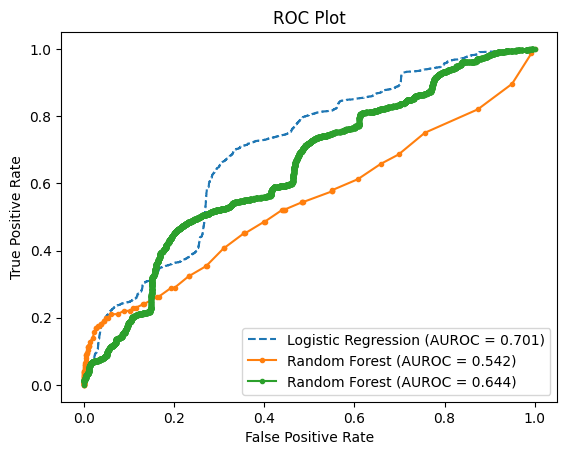

In [606]:
# Plotting ROC plots for the random forrest classifier and the logistic regression classifier

rl_fpr, rl_tpr, _ = roc_curve(y_test, log_regP[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, random_forrestP[:,1])
rn_fpr, rn_tpr, _ = roc_curve(y_test, naive_baiiyesP[:,1])

plt.plot(rl_fpr, rl_tpr, linestyle='--', label='Logistic Regression (AUROC = %0.3f)' % rl_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(rn_fpr, rn_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()